<h1>TRABAJO PRÁCTICO N°2</h2>

* __BORQUEZ Juan__
* __DALESSANDRO Francisco (PANCHO)__
* __ESCOBAR Matías__
* __MIRANDA Francisco__
* __PANONTO Valentín__


<h4> PREGUNTAS </h4>

__1) ¿Qué motivación tenemos para utilizar algoritmos basados en la inferencia lógica en lugar
de utilizar algoritmos de búsqueda para cualquier tipo de problema?__

Las ventajas son la __representatividad y la expresividad__. Utiliza la ventaja de la expresión
declarativa con los algoritmos de búsqueda. De esta manera el algoritmo (o la solución) es más
escalable y más adaptable a nuevos escenarios en comparación con algoritmos de búsqueda tradicional como el A*.

Otra facilidad, es la de incorporar nuevos datos no previstos a la base de conocimiento.

__2) ¿Qué diferencia hay entre una base de conocimientos y el ground truth?__

La base de conocimiento es inmutable.
El ground truth es información mutable, generalmente representa valores entregados por
sensores. Estos se incorporan en la base de conocimientos inmutable para poder realizar otras
inferencias.

__3) ¿Qué diferencia hay entre un valor inferido y un valor percibido?__


__Valor percibido__: Es un valor obtenido de un sensor o una constante conocida previamente.

__Valor inferido__: Valor que fue obtenido en función de la información que se encuentra en la base
del conocimiento, más los valores determinados a partir de las reglas de inferencia.

__4) ¿Qué valores puede tomar una oración atómica de acuerdo a la lógica proposicional?
¿Cómo se modela la frase “Los valores de A comprendidos entre 0 y 9” de acuerdo a esta
sintaxis?__

Verdadero o Falso.

A0^A1^A2^A3^A4^A5^A6^A7^A8^A9

__5) ¿Qué algoritmos se utilizan para resolver problemas modelados con lógica proposicional?__

Algoritmo: Inferencia práctica

Gráfico + encadenamiento hacia adelante/encadenamiento hacia atrás

__6) ¿Qué valores puede tomar una oración atómica de acuerdo a la lógica de primer orden?
¿Cómo se modela la frase “Los valores de A comprendidos entre 0 y 9” de acuerdo a esta
sintaxis?__

Puede tomar valores asignados, lógicos (V o F), valor de relación o asignación a objetos
(Predicados) o relaciones entre objetos.

La frase se modela:
A>0^A<9

__7) ¿Qué algoritmos se utilizan para resolver problemas modelados con lógica de primer
orden?__

Algoritmos: PROLOG, Fast downward.

__8) Describa cómo los planificadores hacen uso de algoritmos de búsqueda globales para
encontrar una secuencia óptima de pasos a seguir para resolver un problema__

Estado inicial, estado objetivo, acciones (Reglas).

A partir del estado inicial, se evalúan las acciones que se puedan realizar. Luego aplicamos las
acciones para evaluar los estados a los que se puede evolucionar y se verifica el conjunto de
objetos y el orden. A partir de acá, se puede pasar al siguiente estado podando el árbol de
búsqueda en función de un cierto costo que se le va a ir asignando a cada uno de los posibles
estados que fueron obtenidos como resultados de las acciones anteriores. Otra opción es
simplemente recorrer el árbol de búsqueda y recorrerlo no en función de un costo sino con un
algoritmo de búsqueda global no informado (búsqueda en profundidad, en anchura, etc.)

El test objetivo se define por el conjunto de predicados que define el estado final.

Las acciones se utilizan como función sucesor.

__<h3>10) Implementación de sistema de Inferencia Difusa para controlar Temperatura de Habitación</h3>__

__<h4>CONDICIONES SUPUESTAS</h4>__

* __Sensor perfecto__
* __Pronóstico de temperatura perfecto__

In [27]:
#LIBRERIAS REQUERIDAS: 
import numpy as np
import matplotlib.pyplot as plt

<h4>1. Funciones de membresia y Subconjuntos borrosos</h4>

In [28]:
#
# Función trapmf(x, [a, b, c, d]): función de pertenencia trapezoidal.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   [a, b, c, d]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c <= d
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trapmf(x, param): float, si x es int, float.
#   trapmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trapmf(x, param):
    # param = [a, b, c, d]
    # a <= b <= c <=d
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    d = float(param[3])
    if (a <= b) and (b <= c) and (c <= d):
        if (type(x) is int) or (type(x) is float):     
            if (x <= a) and (a != b):
                m = 0.0
            if (x <= a) and (a == b):
                m = 1.0
            elif (a <= x) and (x <= b):
                m = (x - a)/(b - a)   
            elif (b <= x) and (x <= c):
                m = 1.0  
            elif (c <= x) and (x <= d):
                m = (d - x)/(d - c)  
            else:
                m = 0.0
            return m
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                if ((x[i] <= a) and (a != b)):
                    m[i] = 0.0
                elif ((x[i] <= a) and (a==b)):
                    m[i] = 1.0 
                elif (a <= x[i]) and (x[i] <= b):
                    m[i] = (x[i] - a)/(b - a)   
                elif (b <= x[i]) and (x[i] <= c):
                    m[i] = 1.0
                elif (c <= x[i]) and (x[i] <= d):
                    m[i] = (d - x[i])/(d - c)  
                else:
                    m[i] = 0.0
            return m
    else:
        return -1

In [29]:
#
# Función trimf(x, param): función de pertenencia triangular.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, c]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trimf(x, param): float, si x es int, float.
#   trimf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trimf(x, param):
    # param = [a, b, c]
    # a <= b <= c
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    if (a <= b) and (b <= c):
        if (type(x) is int) or (type(x) is float):     
            if x <= a:
                m = 0.0
            elif (a <= x) and (x <= b):
                m = (x - a)/(b - a)   
            elif (b <= x) and (x <= c):
                m = (c - x)/(c - b)  
            else:
                m = 0.0
            return m
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                if x[i] <= a:
                    m[i] = 0.0
                elif (a <= x[i]) and (x[i] <= b):
                    m[i] = (x[i] - a)/(b - a)   
                elif (b <= x[i]) and (x[i] <= c):
                    m[i] = (c - x[i])/(c - b)  
                else:
                    m[i] = 0.0
            return m
    else:
        return -1

<h4>Variable Linguistica Z</h4>

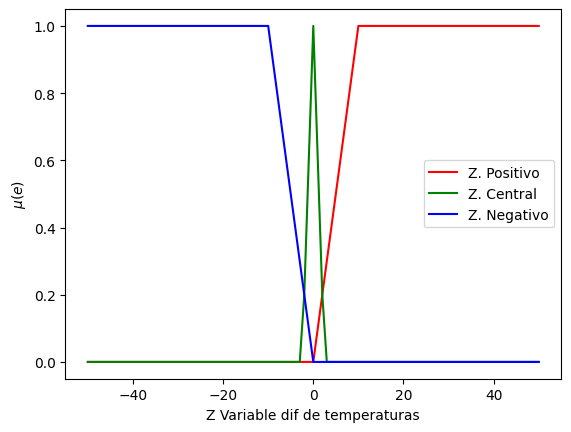

In [30]:
# Universo de discurso para el Z
UZ= np.linspace(-50, 50, 101)
# Soporte de errores 
supZN  = [-400, -400, -10, 0]
supZC  = [-2.5, 0, 2.5]
supZP  = [0, 10, 400, 400]
# Funciones de pertenencia para el Z
ZP = trapmf(UZ, supZP)
ZC = trimf(UZ, supZC)
ZN = trapmf(UZ, supZN)


plt.plot(UZ,ZP,label='Z. Positivo',color='r')
plt.plot(UZ,ZC,label='Z. Central',color='g')
plt.plot(UZ,ZN,label='Z. Negativo',color='b')

plt.legend(loc='best')
plt.xlabel('Z Variable dif de temperaturas')
plt.ylabel('$\mu (e)$')
plt.show()

<h4>Variable Linguistica Zcal</h4>

In [31]:
# Universo de discurso para el Zcal
UZcal= np.linspace(-300, 300, 601)
# Soporte de errores 
supZcalN  = [-400, -400, -50, 0]
supZcalC  = [-25, 0, 25]
supZcalP  = [0, 50, 400, 400]
# Funciones de pertenencia para el Z
ZcalP = trapmf(UZcal, supZcalP)
ZcalC = trimf(UZcal, supZcalC)
ZcalN = trapmf(UZcal, supZcalN)


plt.plot(UZcal,ZcalP,label='Z. cal Positivo',color='r')
plt.plot(UZcal,ZcalC,label='Z. cal Central',color='g')
plt.plot(UZcal,ZcalN,label='Z. cal Negativo',color='b')

plt.legend(loc='best')
plt.xlabel('Z Calentamiento')
plt.ylabel('$\mu (e)$')
plt.show()

<h4>Variable Linguistica Zenf</h4>

In [32]:
# Universo de discurso para el Zenf
UZenf= np.linspace(-100, 100, 201)
# Soporte de errores 
supZenfN  = [-400, -400, -50, 0]
supZenfC  = [-25, 0, 25]
supZenfP  = [0, 50, 400, 400]
# Funciones de pertenencia para el Z enf
ZenfP = trapmf(UZenf, supZenfP)
ZenfC = trimf(UZenf, supZenfC)
ZenfN = trapmf(UZenf, supZenfN)


plt.plot(UZenf,ZenfP,label='Z. enf Positivo',color='r')
plt.plot(UZenf,ZenfC,label='Z. enf Central',color='g')
plt.plot(UZenf,ZenfN,label='Z. enf Negativo',color='b')

plt.legend(loc='best')
plt.xlabel('Z Enfriamiento')
plt.ylabel('$\mu (e)$')
plt.show()

<h4>Variable Linguistica TP</h4>

In [33]:
# Universo de discurso para el TP = Temperatura promedio
UT= np.linspace(-15, 45, 61)
# Soporte de errores 
supTbaja  = [-15, -15, 20, 30]
supTalta  = [20, 30, 45, 45]
# Funciones de pertenencia para el Z
Tbaja = trapmf(UT, supTbaja)
Talta = trapmf(UT, supTalta)


plt.plot(UT,Talta,label='Temp ALTA',color='r')
plt.plot(UT,Tbaja,label='Temp BAJA',color='b')

plt.legend(loc='best')
plt.xlabel('Temperatura Pronostico')
plt.ylabel('$\mu (e)$')
plt.show()

<h4>Variable Linguistica Hora (Dia o Noche)</h4>

In [34]:
# Función Smax(): Norma S
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   Tmin: Norma S (máximo)
#
def Smax(mA, mB):
    Smax = np.zeros([mA.size])
    for i in range(mA.size):
        Smax[i] = max(mA[i], mB[i])
    return Smax

In [35]:
# Universo de discurso para el Hora 
UH= np.linspace(0, 24, 25)
# Soporte de errores 
supDia  = [7 , 9, 19, 21]
supNoche1 = [0, 0, 7, 9]
supNoche2 = [19, 21, 24, 24]

# Funciones de pertenencia para el Z
Dia = trapmf(UH, supDia)
Noche1 = trapmf(UH, supNoche1)
Noche2 = trapmf(UH, supNoche2)

Noche = Smax(Noche1,Noche2)

plt.plot(UH,Dia,label='Dia',color='r')
plt.plot(UH,Noche,label='Noche',color='b')

plt.legend(loc='best')
plt.xlabel('DIA / NOCHE')
plt.ylabel('$\mu (e)$')
plt.show()

<h4>Variable Linguistica Ventana</h4>

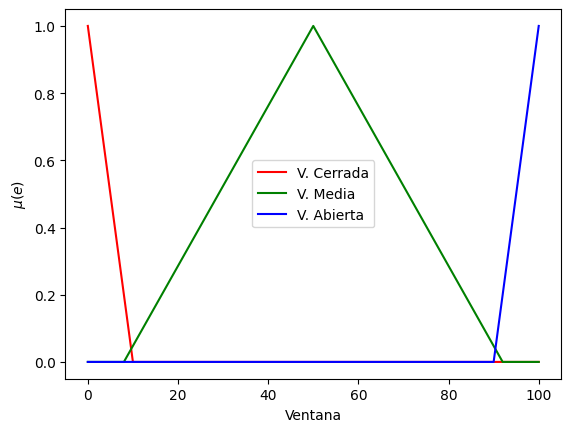

In [36]:
# Universo de discurso para el Zenf
UV= np.linspace(0, 100, 101)
# Soporte de errores 
supVC  = [0, 0, 0, 10]
supVM  = [8, 50, 92]
supVA  = [90, 100, 100, 100]
# Funciones de pertenencia para el Z enf
VC = trapmf(UV, supVC)
VM = trimf(UV, supVM)
VA = trapmf(UV, supVA)

plt.plot(UV,VC,label='V. Cerrada',color='r')
plt.plot(UV,VM,label='V. Media',color='g')
plt.plot(UV,VA,label='V. Abierta',color='b')

plt.legend(loc='best')
plt.xlabel('Ventana')
plt.ylabel('$\mu (e)$')
plt.show()

<h3> Variables Linguísticas </h3>
<div style="display: flex;">
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Hora.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Tp.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Ventana.png" style="width: 100%;">
    </div>
</div>
<div style="display: flex;">
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Z.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Zcal.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Zenf.png" style="width: 100%;">
    </div>
</div>


<h4>2. Borrosificacion</h4>

In [37]:
#Suponemos valores iniciales:

TiNitida    = 20	    # La temperatura interior inicial
print(f"Temperatura interna: {TiNitida} °C")
TeNitida 	= 10        # La temperatura exterior actual
print(f"Temperatura externa: {TeNitida} °C")
TenfNitida	= 25         # La temperatura objetivo Enfriamiento
print(f"Temperatura enfriamiento objetivo: {TenfNitida} °C")
TcalNitida	= 50        # La temperatura objetivo Calida
print(f"Temperatura calentamiento objetivo: {TcalNitida} °C")
ToNitida	= 25    	# La temperatura objetivo
print(f"Temperatura objetivo: {ToNitida} °C")

#DIA
ZNitida 	= (TiNitida - ToNitida)*(TeNitida - TiNitida)
print(f"\nZ: {ZNitida} (°C)^2")
#NOCHE
ZenfNitida 	= (TiNitida - TenfNitida)*(TeNitida - TiNitida)
print(f"Z enfriamiento: {ZenfNitida} (°C)^2")
ZcalNitida	= (TiNitida - TcalNitida)*(TeNitida - TiNitida)
print(f"Z calentamiento: {ZcalNitida} (°C)^2")
HoraNitida	= 8.5	        # Hora actual
print(f"\nHora : {HoraNitida} h")
Tp          = 20 #Temperatura promedio
print(f"Temperatura Pronóstico: {Tp} °C")

Temperatura interna: 20 °C
Temperatura externa: 10 °C
Temperatura enfriamiento objetivo: 25 °C
Temperatura calentamiento objetivo: 50 °C
Temperatura objetivo: 25 °C

Z: 50 (°C)^2
Z enfriamiento: 50 (°C)^2
Z calentamiento: 300 (°C)^2

Hora : 8.5 h
Temperatura Pronóstico: 20 °C


ZN: 0.0
ZC: 0.0
ZP: 1.0


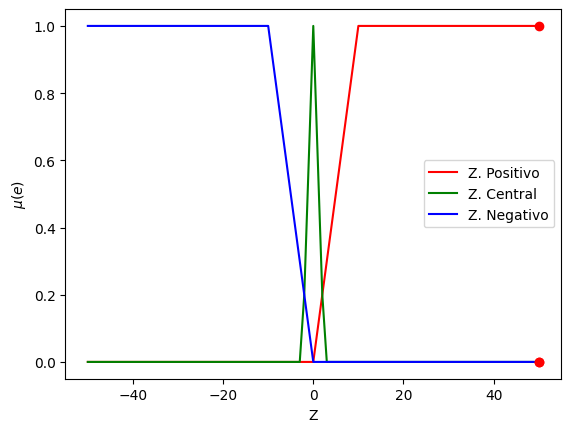

In [51]:
#Fuzzificar

valueZN = trapmf(ZNitida, supZN)
valueZC = trimf(ZNitida, supZC)
valueZP = trapmf(ZNitida, supZP)

# imprimir valores

print("ZN:", valueZN)
print("ZC:", valueZC)
print("ZP:", valueZP)

#Graficamos para visualizar sus posiciones
plt.plot(UZ,ZP,label='Z. Positivo',color='r')
plt.plot(UZ,ZC,label='Z. Central',color='g')
plt.plot(UZ,ZN,label='Z. Negativo',color='b')
plt.plot(ZNitida, valueZN, 'ro')
plt.plot(ZNitida, valueZC,'ro')
plt.plot(ZNitida, valueZP, 'ro')

plt.legend(loc='best')
plt.xlabel('Z')
plt.ylabel('$\mu (e)$')
plt.show()

ZcalN: 0.0
ZcalC: 0.0
ZcalP: 1.0


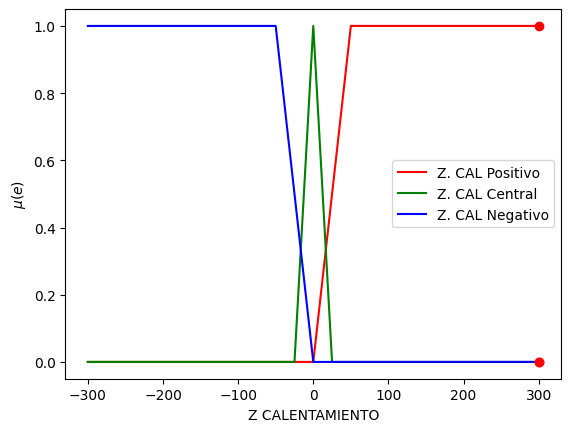

In [50]:
#Fuzzificar

valueZcalN = trapmf(ZcalNitida, supZcalN)
valueZcalC = trimf(ZcalNitida, supZcalC)
valueZcalP = trapmf(ZcalNitida, supZcalP)

# imprimir valores

print("ZcalN:", valueZcalN)
print("ZcalC:", valueZcalC)
print("ZcalP:", valueZcalP)

#Graficamos para visualizar sus posiciones
plt.plot(UZcal,ZcalP,label='Z. CAL Positivo',color='r')
plt.plot(UZcal,ZcalC,label='Z. CAL Central',color='g')
plt.plot(UZcal,ZcalN,label='Z. CAL Negativo',color='b')
plt.plot(ZcalNitida, valueZcalN, 'ro')
plt.plot(ZcalNitida, valueZcalN,'ro')
plt.plot(ZcalNitida, valueZcalP, 'ro')

plt.legend(loc='best')
plt.xlabel('Z CALENTAMIENTO')
plt.ylabel('$\mu (e)$')
plt.show()

ZenfN: 0.0
ZenfC: 0.0
ZenfP: 1.0


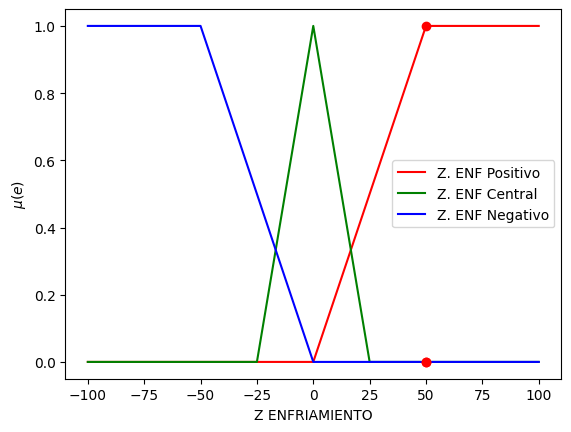

In [40]:
#Fuzzificar:

valueZenfN = trapmf(ZenfNitida, supZenfN)
valueZenfC = trimf(ZenfNitida, supZenfC)
valueZenfP = trapmf(ZenfNitida, supZenfP)

# imprimir valores

print("ZenfN:", valueZenfN)
print("ZenfC:", valueZenfC)
print("ZenfP:", valueZenfP)

#Graficamos para visualizar sus posiciones
plt.plot(UZenf,ZenfP,label='Z. ENF Positivo',color='r')
plt.plot(UZenf,ZenfC,label='Z. ENF Central',color='g')
plt.plot(UZenf,ZenfN,label='Z. ENF Negativo',color='b')
plt.plot(ZenfNitida, valueZenfN, 'ro')
plt.plot(ZenfNitida, valueZenfC,'ro')
plt.plot(ZenfNitida, valueZenfP, 'ro')

plt.legend(loc='best')
plt.xlabel('Z ENFRIAMIENTO')
plt.ylabel('$\mu (e)$')
plt.show()

In [41]:
#Fuzzificar:

valueTbaja = trapmf(Tp, supTbaja)
valueTalta = trapmf(Tp, supTalta)

# imprimir valores

print("T. Baja:", valueTbaja)
print("T. Alta:", valueTalta)

#Graficamos para visualizar sus posiciones
plt.plot(UT,Talta,label='Temp ALTA',color='r')
plt.plot(UT,Tbaja,label='Temp BAJA',color='b')
plt.plot(Tp, valueTbaja, 'ro')
plt.plot(Tp, valueTalta,'ro')

plt.legend(loc='best')
plt.xlabel('Temperatura Pronostico')
plt.ylabel('$\mu (e)$')
plt.show()



T. Baja: 1.0
T. Alta: 0.0


In [42]:
#Fuzzificar:

valueDia = trapmf(HoraNitida, supDia)
valueNoche = max(trapmf(HoraNitida, supNoche1),trapmf(HoraNitida, supNoche2))

# imprimir valores

print("Dia:", valueDia)
print("Noche:", valueNoche)

#Graficamos para visualizar sus posiciones
plt.plot(UH,Dia,label='Dia',color='r')
plt.plot(UH,Noche,label='Noche',color='b')
plt.plot(HoraNitida, valueDia, 'ro')
plt.plot(HoraNitida, valueNoche,'ro')

plt.legend(loc='best')
plt.xlabel('DIA / NOCHE')
plt.ylabel('$\mu (e)$')
plt.show()


Dia: 0.75
Noche: 0.25


<h4>2. Inferencia Difusa</h4>

![Texto alternativo](./imagenes/Reglas%20de%20inferencia.PNG)

In [43]:
# Función cut(): cortar
# Argumentos:
#   mf: numpy.ndarray
#   value: Int, Float, valor de corte
# Retorna:
#   numpy.ndarray: función cortada

def cut(value, mf):
    value = float(value)
    aux = np.zeros(mf.size)
    if (type(value) is int) or (type(value) is float):
        for i in range(mf.size):
            aux[i] = min(value, mf[i])
        return aux
    else:
        return -1
    
# Función union(): Unión de funciones de membresía por método max
# Argumentos:
#   data: arreglo de elementos numpy.ndarray, todos de igual dimensión
# Retorna:
#   numpy.ndarray: unión de las funciones
#
def union(data):
    aux = np.zeros(data[0].size)
    for j in range(len(data)):
        for i in range(aux.size):
            aux[i] = max(aux[i], data[j][i])
    return aux

In [52]:
# Corte de las funciones
cutValueVc = max(min(valueDia,valueZP),min(valueNoche, valueTalta, valueZenfP), min(valueNoche, valueTbaja, valueZcalP))
VCcut = cut((cutValueVc), VC)
print(f"Corte Ventana Cerrada: {cutValueVc}")

cutValueVM = max(min(valueDia,valueZC),min(valueNoche, valueTalta, valueZenfC), min(valueNoche, valueTbaja, valueZcalC))
VMcut = cut(cutValueVM, VM)
print(f"Corte Ventana en el centro: {cutValueVM}")

cutValueVA = max(min(valueDia,valueZN),min(valueNoche, valueTalta, valueZenfN), min(valueNoche, valueTbaja, valueZcalN))
VAcut = cut(cutValueVA, VA)
print(f"Corte Ventana Abierta: {cutValueVA}")

# Union
Vp = union([VCcut,VMcut,VAcut])

# Graficamos
plt.plot(UV,VA, label = 'V Abierta')
plt.plot(UV,VM, label = 'V Media')
plt.plot(UV,VC, label = 'V Cerrada')

plt.legend(loc='best')
plt.xlabel('Ventana 0 a 100')
plt.ylabel('$\mu (e)$')
plt.plot(UV, Vp, label="Vp Inferencia Difusa", linewidth=3)
plt.legend(loc='best')
plt.show()

Corte Ventana Cerrada: 0.75
Corte Ventana en el centro: 0.0
Corte Ventana Abierta: 0.0


<h3> Variables Linguísticas Borrosificadas e Inferencia</h3>
<div style="display: flex;">
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Horaborrosificacion.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Tpborrosificacion.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Zborrosificacion.png" style="width: 100%;">
    </div>
</div>
<div style="display: flex;">
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Zcalborrosificacion.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/Zenfborrosificacion.png" style="width: 100%;">
    </div>
    <div style="flex: 33.33%; padding: 5px;">
        <img src="./imagenes/inferencia.png" style="width: 100%;">
    </div>
</div>

<h4>3. Desborrificacion</h4>

In [45]:
# Función defuzzy(): Defuzzyficación
# Argumentos:
#   y: numpy.ndarray, universo de discurso de salida
#   mf: función resultante del proceso de fuzzyficación
# Retorna:
#   Float: valor de salida
def defuzzy(y, mf):
    num = 0
    den = 0
    for i in range(y.size):
        num = num + y[i]*mf[i]
        den = den + mf[i]
    y0 = num/den
    return y0

Centroide =  3.2178217821782176


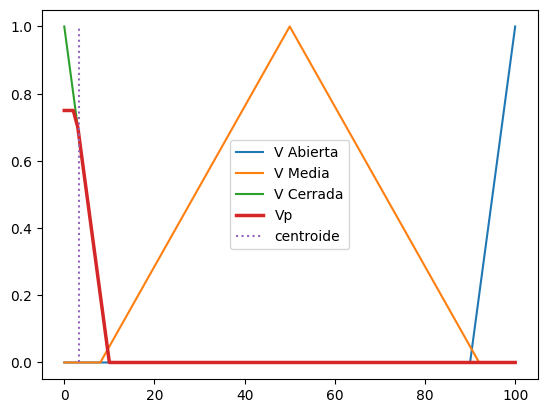

In [46]:
# Aplicamos defuzzificación
centroide = defuzzy(UV, Vp)

# El valor es:
print ('Centroide = ', centroide)

#Graficamos para visualizar sus posiciones
plt.plot(UV,VA, label = 'V Abierta')
plt.plot(UV,VM, label = 'V Media')
plt.plot(UV,VC, label = 'V Cerrada')

plt.plot(UV, Vp, linewidth=2.5, linestyle="-", label="Vp")
plt.plot([centroide, centroide], [0, 1], linestyle=":", label="centroide")
plt.legend(loc='best')
plt.show()